In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import perf_counter_ns, perf_counter

In [2]:
data = pd.read_excel("combined-dataset.xlsx")
data

,a,b,c,y
0,-0.02,0.05,0.15,low severity
1,-0.02,0.05,0.15,low severity
2,-0.02,0.05,0.14,low severity
3,-0.03,0.04,0.13,low severity
4,-0.03,0.04,0.12,low severity
...,...,...,...,...
6205,20.00,195.00,1815.00,high severity
6206,1.27,-10.21,2.02,high severity
6207,-75.00,-137.00,2027.00,high severity
6208,1.26,-9.39,1.64,high severity


## Doing One Hot Encoding 
### 0 -> low severity
### 1 -> High severity

In [3]:
data.y.replace(to_replace=['low severity','high severity'],value=[0,1],inplace=True)

In [4]:
data

,a,b,c,y
0,-0.02,0.05,0.15,0
1,-0.02,0.05,0.15,0
2,-0.02,0.05,0.14,0
3,-0.03,0.04,0.13,0
4,-0.03,0.04,0.12,0
...,...,...,...,...
6205,20.00,195.00,1815.00,1
6206,1.27,-10.21,2.02,1
6207,-75.00,-137.00,2027.00,1
6208,1.26,-9.39,1.64,1


In [5]:
temp = data


In [6]:
X = temp.drop("y",axis=1)
X

,a,b,c
0,-0.02,0.05,0.15
1,-0.02,0.05,0.15
2,-0.02,0.05,0.14
3,-0.03,0.04,0.13
4,-0.03,0.04,0.12
...,...,...,...
6205,20.00,195.00,1815.00
6206,1.27,-10.21,2.02
6207,-75.00,-137.00,2027.00
6208,1.26,-9.39,1.64


In [7]:
y = data["y"]
y

0       0
1       0
2       0
3       0
4       0
       ..
6205    1
6206    1
6207    1
6208    1
6209    1
Name: y, Length: 6210, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

k_range = 2
start  = perf_counter_ns()
knn = KNeighborsClassifier(n_neighbors=k_range)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
end = perf_counter_ns()
knn_time_ns = end - start
knn_time_sec = (end - start)/1000000000
print(f"Time of knn model in nano seconds: {knn_time_ns}")
print(f"Time of knn model in seconds: {knn_time_sec}")

Time of knn model in nano seconds: 92203400
Time of knn model in seconds: 0.0922034


### Prediction from KNN Model

In [34]:
acc=accuracy_score(y_test,y_pred)*100
print(f"The accuracy of the KNN Model is {acc}")

The accuracy of the KNN Model is 99.9597423510467


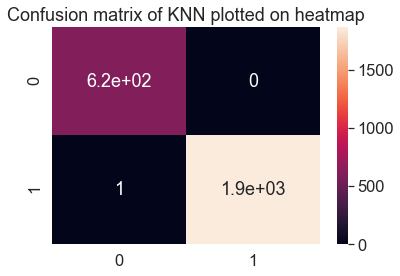

In [35]:
sns.set(font_scale=1.5)
conf = confusion_matrix(y_test,y_pred)
plt.title("Confusion matrix of KNN plotted on heatmap")
sns.heatmap(conf,annot=True)
plt.show()

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [37]:
start = perf_counter_ns()
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
end = perf_counter_ns()
DT_time_ns = end - start
DT_time_sec = (end - start)/1000000000
print(f"Time of Decision Tree in nano seconds: {DT_time_ns}")
print(f"Time of Decision Tree in seconds: {DT_time_sec}")

Time of Decision Tree in nano seconds: 9632900
Time of Decision Tree in seconds: 0.0096329


### Prediction from Decision Tree Model

In [38]:
acc=accuracy_score(y_test,y_pred)*100
print(f"The accuracy of the Decision Tree Model is {acc}")

The accuracy of the Decision Tree Model is 99.9194847020934


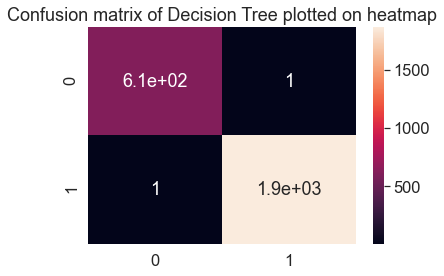

In [39]:
sns.set(font_scale=1.5)
conf = confusion_matrix(y_test,y_pred)
plt.title("Confusion matrix of Decision Tree plotted on heatmap")
sns.heatmap(conf,annot=True)
plt.show()

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
start = perf_counter_ns()
clf=RandomForestClassifier(n_estimators=30)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
end = perf_counter_ns()
RF_time_ns = end - start
RF_time_sec = (end - start)/1000000000
print(f"Time of Random Forest in nano seconds: {RF_time_ns}")
print(f"Time of Random Forest in seconds: {RF_time_sec}")

Time of Random Forest in nano seconds: 95141500
Time of Random Forest in seconds: 0.0951415


### Prediction from Random Forest Model

In [41]:
acc=accuracy_score(y_test,y_pred)*100
print(f"The accuracy of the Random Forest Model is {acc}")

The accuracy of the Random Forest Model is 99.9194847020934


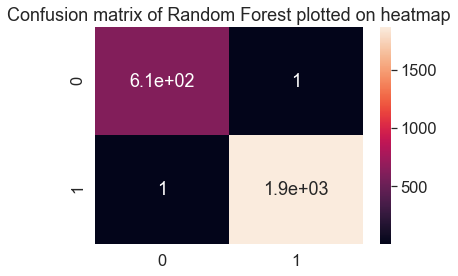

In [42]:
sns.set(font_scale=1.5)
conf = confusion_matrix(y_test,y_pred)
plt.title("Confusion matrix of Random Forest plotted on heatmap")
sns.heatmap(conf,annot=True)
plt.show()

# XG Boost

In [43]:
import xgboost as xgb 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [44]:
start = perf_counter()
xg_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators=10)
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)
end = perf_counter_ns()
XG_time_ns = end - start
XG_time_sec = (end - start)/1000000000
print(f"Time of XG Boost in nano seconds: {XG_time_ns}")
print(f"Time of XG Boost in seconds: {XG_time_sec}")

[23:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time of XG Boost in nano seconds: 1197709032102.3477
Time of XG Boost in seconds: 1197.7090321023477


C:\Users\mufad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Prediction from XG Boost Model

In [45]:
acc=accuracy_score(y_test,y_pred)*100
print(f"The accuracy of the XGBoost Model is {acc}")

The accuracy of the XGBoost Model is 99.23510466988728


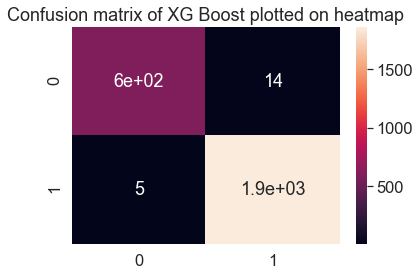

In [46]:
sns.set(font_scale=1.5)
conf = confusion_matrix(y_test,y_pred)
plt.title("Confusion matrix of XG Boost plotted on heatmap")
sns.heatmap(conf,annot=True)
plt.show()

In [47]:
temp = {'Model':['KNN', 'Random Forest', 'Decision Tree', 'XG Boost'],
        'Time in ns':[knn_time_ns, RF_time_ns, DT_time_ns, XG_time_ns],
        'Time in seconds':[knn_time_sec, RF_time_sec, DT_time_sec, XG_time_sec]}
df = pd.DataFrame(temp)
df

,Model,Time in ns,Time in seconds
0,KNN,9.220340e+07,0.092203
1,Random Forest,9.514150e+07,0.095142
2,Decision Tree,9.632900e+06,0.009633
3,XG Boost,1.197709e+12,1197.709032


In [48]:
df.to_csv("Time-taken-by-model.csv")